1) a. Script below.
b. Plots below.

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### This script computes thermal wind from mid-ocean location in IGY 36N section.

### Define constants

In [2]:
# Compute value of Coriolis parameter at 36N
f = 2 * (2*np.pi) * (1/86164) * np.sin(np.deg2rad(36)) # units 1/s

# Set value of gravitational acceleration g
g = 9.8 # units m/s^2

# Set value of rho_0 (average seawater density)
rho0 = 1035 # units kg/m^3

# Define radius of the Earth
R = 6371000 # m

### Load data

In [3]:
data = loadmat('igy36n_gVSpressure_gr.mat')
print(data.keys())

xax = np.squeeze(data['xax'])
yax = np.squeeze(data['yax'])
zz = data['zz'] # neutral density
print(xax.shape,yax.shape,zz.shape)

dict_keys(['xax', 'yax', 'zz'])
(138,) (119,) (119, 138)


### Plot density contours

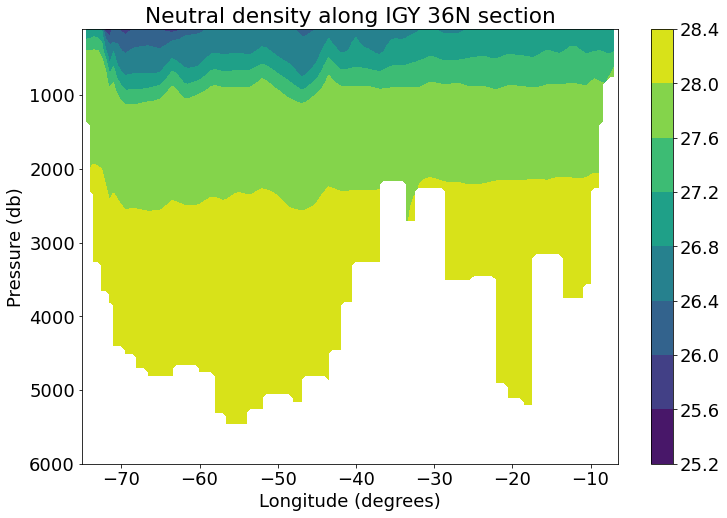

In [4]:
# Set the default fontsize
font = {'size'   : 18}
matplotlib.rc('font', **font)

plt.figure(figsize=(12,8))
plt.contourf(xax,yax,zz)
plt.gca().invert_yaxis()
plt.xlabel('Longitude (degrees)')
plt.ylabel('Pressure (db)')
plt.title('Neutral density along IGY 36N section')
plt.colorbar()

plt.savefig('Neutral_density_IGY36N.png')

#### Find a location in the middle of the gulf stream to compute thermal wind

In [5]:
index = np.where(xax==-72)[0][0]
print(index)

6


We will compute the thermal wind with a centered difference, using the gridpoints on either side of this (indices 5 and 7). 

#### Compute deltax, the distance between indices 5 and 7 on the grid xax

In [6]:
deltax_degrees = xax[index+1] - xax[index-1]
deltax = 2 * np.pi * R * (deltax_degrees/360) * np.cos(np.deg2rad(36)) # units: m
print(deltax_degrees)
print(deltax)

1.0
89958.58534372367


### Compute thermal wind

In [7]:
dvdz = -(g/(f * rho0)) * (zz[:,index+1] - zz[:,index-1]) / deltax # units: 1/s

### Plot the thermal wind

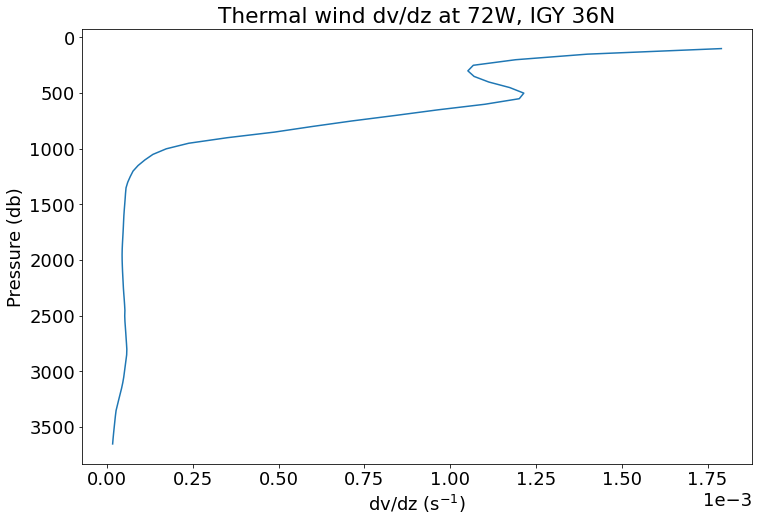

In [8]:
plt.figure(figsize=(12,8))
plt.plot(dvdz,yax)
plt.gca().invert_yaxis()
plt.xlabel('dv/dz (s$^{-1}$)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2)) # set xticklabel to scientific notation
plt.ylabel('Pressure (db)')
plt.title('Thermal wind dv/dz at 72W, IGY 36N')

plt.savefig('Thermal_wind_IGY36N_72W.png')

### Compute velocity v, assuming a value of zero at the bottom

In [9]:
print(yax)
dz = 50 # 50 dbar grid spacing in vertical - as one can see by checking 'yax'

# We want to find the length of values of dvdz that are not nan (there are several nan values
# at the bottom of the seafloor)
length_good = (~np.isnan(dvdz)).sum()
print(length_good)

[ 101.  151.  201.  251.  301.  351.  401.  451.  501.  551.  601.  651.
  701.  751.  801.  851.  901.  951. 1001. 1051. 1101. 1151. 1201. 1251.
 1301. 1351. 1401. 1451. 1501. 1551. 1601. 1651. 1701. 1751. 1801. 1851.
 1901. 1951. 2001. 2051. 2101. 2151. 2201. 2251. 2301. 2351. 2401. 2451.
 2501. 2551. 2601. 2651. 2701. 2751. 2801. 2851. 2901. 2951. 3001. 3051.
 3101. 3151. 3201. 3251. 3301. 3351. 3401. 3451. 3501. 3551. 3601. 3651.
 3701. 3751. 3801. 3851. 3901. 3951. 4001. 4051. 4101. 4151. 4201. 4251.
 4301. 4351. 4401. 4451. 4501. 4551. 4601. 4651. 4701. 4751. 4801. 4851.
 4901. 4951. 5001. 5051. 5101. 5151. 5201. 5251. 5301. 5351. 5401. 5451.
 5501. 5551. 5601. 5651. 5701. 5751. 5801. 5851. 5901. 5951. 6001.]
72


In [10]:
# Define v
v = np.zeros(length_good) # initialize the array
for m in np.arange(2,length_good+1):
    n = length_good - m
    v[n] = v[n+1] + dvdz[n] * dz

### Plot velocity v

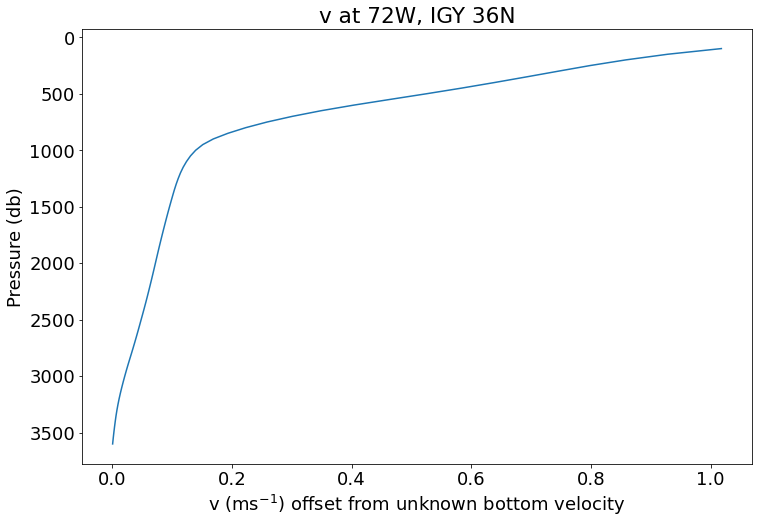

In [11]:
plt.figure(figsize=(12,8))
plt.plot(v[:-1],yax[:length_good-1])
plt.gca().invert_yaxis()
plt.xlabel('v (ms$^{-1}$) offset from unknown bottom velocity')
plt.ylabel('Pressure (db)')
plt.title('v at 72W, IGY 36N')
plt.savefig('v_IGY36N.png')

c. If we assume that the velocity at the bottom of the profile is zero, what value do we obtain for the velocity at the top of the profile?

If we assume that the velocity at the bottom of the profile is zero, we obtain a value of 1.0 m/s for the velocity at the top of the profile.

2) a. Script below. 
b. Plots below.

In [12]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
from plot_colorbar import colorbar
import warnings
warnings.filterwarnings('ignore')

## Load data

In [13]:
data = loadmat('meandynamicoceantopography.mat')
print(data.keys())

ssh = data['dynamicheight']
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])
print('ssh shape is ',ssh.shape)

# Convert ssh from cm to m
ssh = ssh/100

dict_keys(['__header__', '__version__', '__globals__', 'lats', 'dynamicheight', 'lons'])
ssh shape is  (289, 720)


## Plot the snapshot of ssh

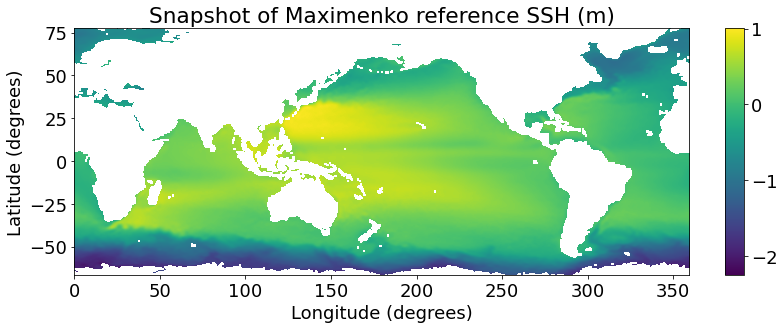

In [14]:
# Set the default fontsize
font = {'size'   : 18}
matplotlib.rc('font', **font)

plt.figure(figsize=(12,8))
im = plt.imshow(ssh,origin='lower',extent=[lons[0],lons[-1],lats[0],lats[-1]]) 
plt.title('Snapshot of Maximenko reference SSH (m)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
colorbar(im)
plt.savefig('maximenkossh.png')

## Compute velocities for this snapshot

In [15]:
# Create a padded array to take derivatives using centered differences)
# Concatenate columns to allow for periodic boundary condition in longitude
ssh_col_padded = np.hstack((ssh[:,-1:],ssh[:,:],ssh[:,0:1]))
# Add extra rows of nans at top and bottom
ssh_row_padded = np.vstack((np.full(ssh.shape[1],np.nan),ssh[:,:],np.full(ssh.shape[1],np.nan)))

# Take centered differences
diffy = ssh_row_padded[2:,:] - ssh_row_padded[:-2,:]
diffx = ssh_col_padded[:,2:] - ssh_col_padded[:,:-2]
print('diffy and diffx shapes are ',diffy.shape,diffx.shape)

# Compute f arrays
f = 2*2*np.pi*(1/86164) * np.sin(np.deg2rad(lats)) # by default this is defined as a row vector
f.shape = (f.shape[0],1) # redefine as a column vector
f = np.broadcast_to(f,(ssh.shape[0],ssh.shape[1])) # repeat the column vector for the number of columns in ssh
print('f shape is ',f.shape)

# Compute value of dy, the grid spacing in the north-south direction
# The calculation below is for a grid spacing of 0.5 degrees, the grid spacing of the Maximenko dataset
# Just look at how many datapoints there are in each direction to see proper gridding - keep at 0.5 for both

gridspacing = 0.5
dy = (gridspacing/360)*2*np.pi*6371000  

# Compute array of dx values, where dx is the grid spacing in the east-west direction, which changes with 
# cos(latitude) on a latitude-longitude grid

dx = (gridspacing/360)*2*np.pi*6371000 * np.cos(np.deg2rad(lats))
dx.shape = (dx.shape[0],1)
dx = np.broadcast_to(dx,(ssh.shape[0],ssh.shape[1]))
print('dx shape is ',dx.shape)

# Compute u, the east-west velocity

g = 9.8 # m/s^2
u = - g*(1/(2*dy))*(diffy)/f

# Compute v, the north-south velocity:

v = g*diffx/(2*f*dx)

# Set the values of v at the poles to be nan:
v[1,:] = np.nan
v[-1,:] = np.nan

# Find the indices with latitudes between -5 and +5 degrees, and 
# force the values here to be NaN

index = np.where(abs(lats)<5)
u[index,:] = np.nan
v[index,:] = np.nan

# Set u and v to be nan whenever one of them is nan:

index = np.where(np.isnan(u*v))
u[index]= np.nan
v[index]= np.nan

# Compute rms speed--square root of sum of squares of velocity components
speed = np.sqrt(u**2 + v**2)

diffy and diffx shapes are  (289, 720) (289, 720)
f shape is  (289, 720)
dx shape is  (289, 720)


## Plot speed

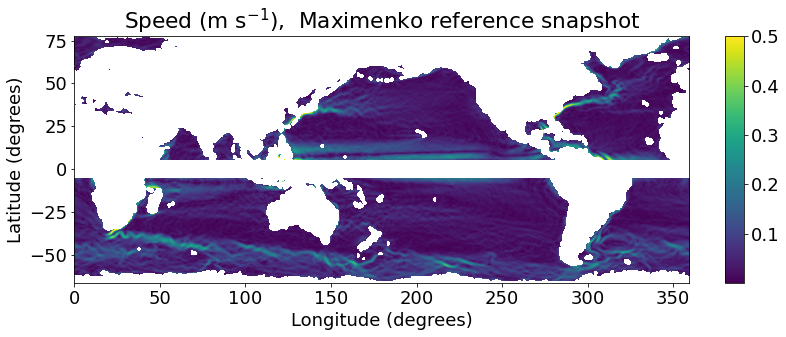

In [16]:
plt.figure(figsize=(12,8))
im = plt.imshow(speed,origin='lower',extent=[lons[0],lons[-1],lats[0],lats[-1]],vmax=0.5)
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.title('Speed (m s$^{-1}$),  Maximenko reference snapshot')
colorbar(im)

plt.savefig('maximenkospeeds.png')

## Plot u and v along 30 degrees North

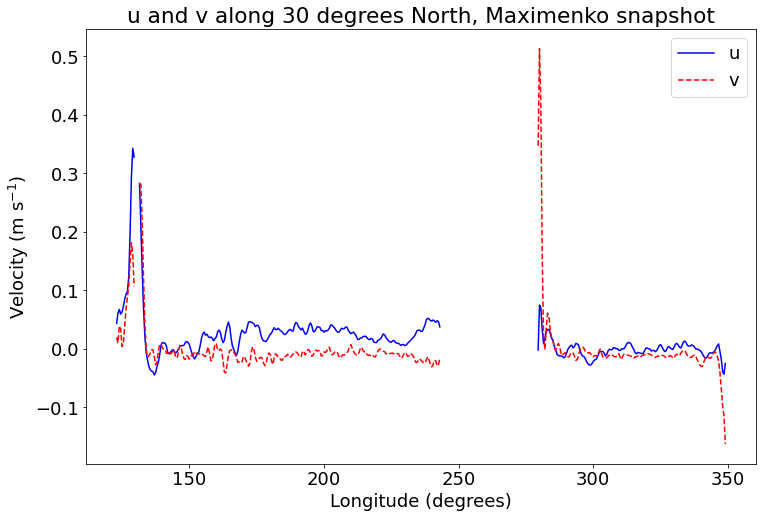

In [17]:
plt.figure(figsize=(12,8))
plt.plot(lons,np.squeeze(u[lats==30,:]),'b-',label='u')
plt.plot(lons,np.squeeze(v[lats==30,:]),'r--',label='v')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Velocity (m s$^{-1}$)')
plt.title('u and v along 30 degrees North, Maximenko snapshot')
plt.legend()

plt.savefig('maximenkovelocities_30North.png')

c. What are some typical maximum speeds computed from the mean dynamic topography, in regions of strong currents such as the Gulf Stream, Kuroshio, East Australia Current, Malvinas Current, Agulhas Current, and Antarctic Circumpolar Current?

Some typical maximum speeds computed from the mean dynamic topography, in regions of strong currents, are 0.5 m/s.

d. How do these maximum speeds compare with the maxima seen in the altimeter snapshot?

These maximum speeds are the same as the maxima seen in the altimeter snapshot.

e. How do they compare with the velocity at the top of the Gulf Stream profile discussed in Question 1?

They are about half the velocity at the top of the Gulf Stream profile discussed in Question 1.

In [18]:
print(lons[246])
print(lons[486])
print(lons[559])
print(lons[698])
print(lats[193])

123.0
243.0
279.5
349.0
30.0


In [19]:
print(np.mean(v[193,559:563]))
print(np.mean(v[193,563:699]))

0.36054603035618754
-0.011821738144281236


f. In the western Atlantic, are the velocities predominantly northward, or southward?

In the western Atlantic, the velocities are predominantly northward. I got a mean velocity of about +0.36 m/s.

g. Are velocities in the eastern Atlantic predominantly southward, or northward? 

The velocities in the eastern Atlantic are predominantly southward. I got a mean velocity of about -0.01 m/s. 

In [20]:
print(np.nanmean(v[193,246:268]))
print(np.nanmean(v[193,268:487]))

0.10320869090012609
-0.01060307251429561


h.  In the western Pacific, are the velocities predominantly northward, or southward?

In the western Pacific, the velocities are predominantly northward. I got a mean velocity of about +0.10 m/s.

i. In the eastern Pacific, are the velocities predominantly northward, or southward?

In the eastern Pacific, the velocities are predominantly southward. I got a mean velocity of about -0.01 m/s.